In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import talib as tb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
ticker = 'MSFT'
print(ticker)
a1 = yf.Ticker(ticker)
df1 = a1.history(ticker , start="2014-01-01", end="2017-12-31")

position = 0
pos_index = 0
trades = 0
target = 1
stoploss = 0.7
pnl_1 = []
realised_pl = 0
position_1 = []
tradebook = {}

df1['slowk'],df1['slowd'] = tb.STOCH(df1.High,df1.Low,df1.Close)
df1['slow diff'] = df1['slowk'] - df1['slowd']
df1['RSI'] = tb.RSI(df1['Close'])

df = df1.dropna()

for i in range(len(df)):          

    if ((position == 0) & (df['RSI'].loc[df.index[i]] < 50) & (df['slowk'].loc[df.index[i]] < 25) & (df['slowd'].loc[df.index[i]] < 25) &
        (df['slow diff'].loc[df.index[i]] > 0)):
            position_time = df.index[i].time()
            pos_index = df.index[i]
            entry_price = df.loc[df.index[i+1],'Open']
            position = 1
            position_1.append(pos_index)
            print('long position at {}'.format(df.index[i]))
            trades = trades + 1
            continue
    if ((position == 0) & (df['RSI'].loc[df.index[i]] > 50) & (df['slowk'].loc[df.index[i]] > 75) & (df['slowd'].loc[df.index[i]] > 75) &
        (df['slow diff'].loc[df.index[i]] < 0)):
            position_time = df.index[i].time()
            pos_index = df.index[i]
            entry_price = df.loc[df.index[i+1],'Open']
            position = -1
            position_1.append(pos_index)
            print('short position at {}'.format(df.index[i]))
            trades = trades+1
            continue
            
    if (pos_index!=0):
        pnl = ((df.loc[df.index[i],'Close']- entry_price)/entry_price)*(position)*100 
        
        
    if ((position != 0) and ((pnl  >target) or (pnl < -stoploss))):
        realised_pl = realised_pl + pnl
        pnl_1.append(pnl)
        position = 0
        print('position exited at {}'.format(df.index[i].time()))
        pos_index = 0
        tradebook[trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :df.index[i], 'pnl' :pnl}
        print(pnl)
    elif ((position != 0) and (df.index[i].time() == dt.time(0,0))):
        realised_pl = realised_pl + pnl
        pnl_1.append(pnl)
        tradebook[trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :df.index[i], 'pnl' :pnl}
        position = 0
        print('position covered at {}'.format(df.index[i].time()))
        pos_index = 0
        print(pnl)
        pnl = 0
print("Net pl =",realised_pl,'%')    


MSFT
long position at 2014-02-07 00:00:00
position covered at 00:00:00
0.4640954517833481
short position at 2014-02-14 00:00:00
position covered at 00:00:00
0.5580730619427493
short position at 2014-03-25 00:00:00
position exited at 00:00:00
1.704542081303762
long position at 2014-05-07 00:00:00
position covered at 00:00:00
0.7625806708107167
short position at 2014-06-10 00:00:00
position covered at 00:00:00
0.17102295211896631
short position at 2014-06-19 00:00:00
position covered at 00:00:00
-0.5548842895124222
short position at 2014-07-17 00:00:00
position covered at 00:00:00
-0.08957917013037275
long position at 2014-08-01 00:00:00
position covered at 00:00:00
0.9308766577109634
short position at 2014-08-20 00:00:00
position exited at 00:00:00
-0.8474600062937454
short position at 2014-08-22 00:00:00
position covered at 00:00:00
0.5066153066150997
short position at 2014-09-12 00:00:00
position covered at 00:00:00
0.6446051378577747
long position at 2014-10-15 00:00:00
position cove

In [4]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit/Loss'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit/Loss
1,00:00:00,31.6001,1,2014-02-10,0.464095,0.146655
2,00:00:00,32.7062,-1,2014-02-18,0.558073,0.182525
3,00:00:00,35.1833,0,2014-03-26,1.70454,0.599714
4,00:00:00,34.1925,1,2014-05-08,0.762581,0.260745
5,00:00:00,35.8254,-1,2014-06-11,0.171023,0.0612696
...,...,...,...,...,...,...
64,00:00:00,72.6585,-1,2017-10-11,-0.078572,-0.0570892
65,00:00:00,73.8289,-1,2017-10-13,0.128881,0.0951511
66,00:00:00,73.7147,-1,2017-10-17,-0.154892,-0.114178
67,00:00:00,73.8098,-1,2017-10-19,-0.438319,-0.323522


In [5]:
cagr = (float(tradebook_df['entry_price'].iloc[-1])/float(tradebook_df['entry_price'].iloc[0]))**(1/4) - 1
print("CAGR =",cagr)
print("CAGR (%) =",cagr*100,'%')

CAGR = 0.2415155411864156
CAGR (%) = 24.15155411864156 %


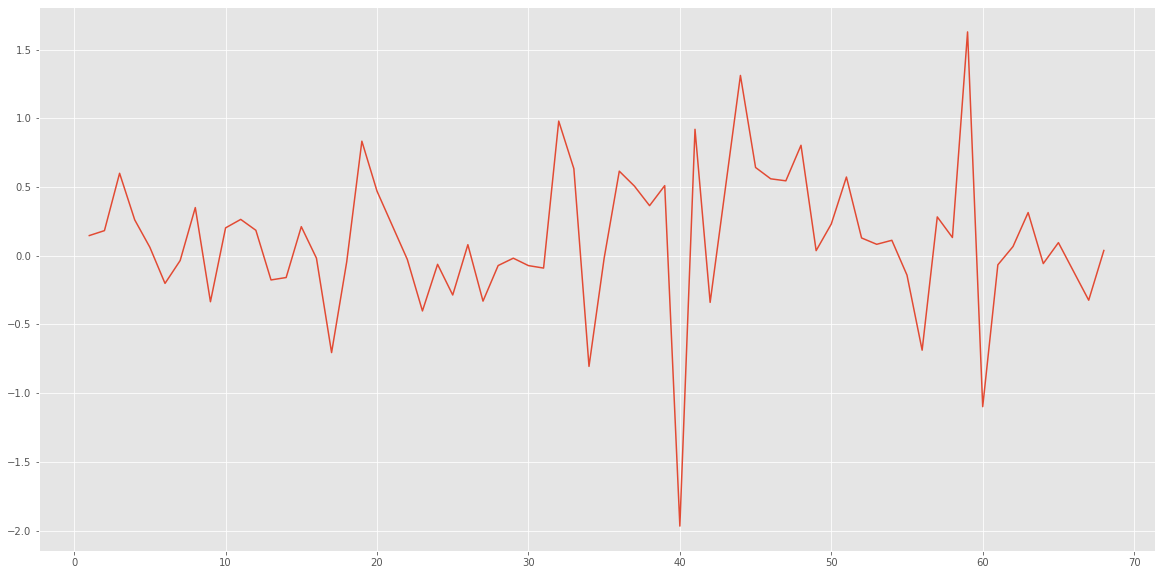

In [6]:
plt.plot(tradebook_df['Profit/Loss'])